# Matplotlib assignment (Week 2)

Written by Ryan Rubenzahl

Submitted by Chetan Chawla

First, our standard imports:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='sans serif', size=16)

## 1. Creating a "Corner" plot

In this short assignment you will create a "corner" plot, which is a really nice way of visualizing multi-dimensional histograms. In this notebook, we'll deal with the 2-dimensional case.

**Note:** The Python package [corner.py](https://corner.readthedocs.io/en/latest/) is a beautiful Python implementation of this, but we'll write our own using what we learned in the Matplotlib tutorial.

## The data

Using numpy we generate a 2-dimensional Gaussian distribution, with a strong covariance between the two variables.

In [10]:
mean = [0, 0]
cov  = [[1, 1], [1, 2]]  # covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 10000).T 
print("x shape: ", x.shape, "\n y shape: ", y.shape)
# Here the function returns a random x and y values according to Gaussian or normal distribution
# with a mean of 0 each and covariance of 1,1 and 1,2. There are 10,000 plot points for x and y.
# .T transposes the output of the multivariate_normal() function to be stored in the variables x and y

x shape:  (10000,) 
 y shape:  (10000,)


## The assignment

Create a "corner" plot displaying the 2-D Gaussian data above. This should include the following elements:
1. A histogram of the x-data
2. A histogram of the y-data
3. A "density" plot of the x, y data. This can be a scatter plot with some transparency set (e.g. alpha=)

You may find the command (courtesy of [StackOverflow](https://stackoverflow.com/questions/4209467/matplotlib-share-x-axis-but-dont-show-x-axis-tick-labels-for-both-just-one))

`plt.setp(ax1.get_xticklabels(), visible=False)`

useful for hiding the ticklabels for `ax1` while `sharex=True` between `ax1` and `ax2`, but still keeping ticklabels for `ax2`. A similar thing can be done for yticklabels. You can also use `orientation='horizontal'` in a `hist` plot to rotate the histogram 90 degrees.

Finally, save the figure using the `plt.savefig` command. Some possible output formats are .eps (vectorized), .pdf, or .png. For outputting figures to include in a paper, for example, .eps is usually the way to go. Don't forget to set `bbox_inches='tight'` when saving your figure, so that everything is nicely formatted (try saving a figure with and without that option to see how much of a difference it makes!)

The final output should look something like this:

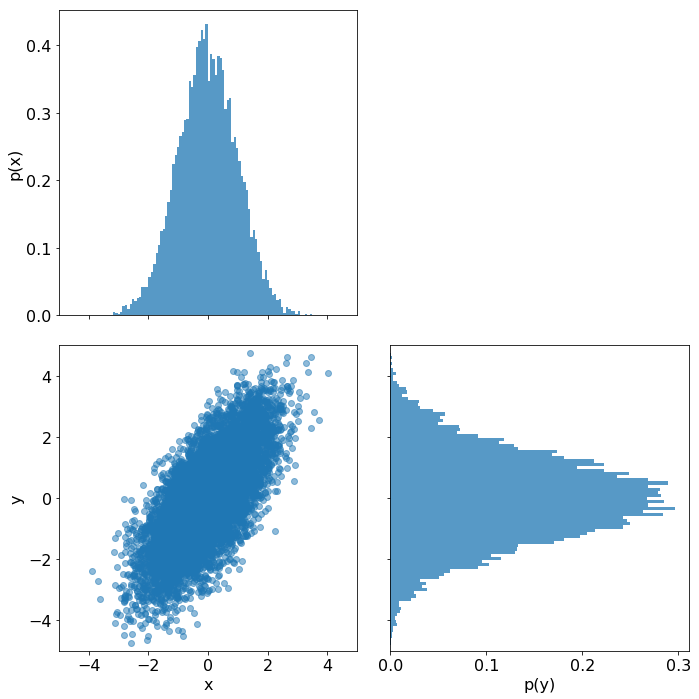

Feel free to change colors, fonts, plot styles (e.g. a bar histogram instead of filled, colorscale for the density plot) to your personal desire. The sky is the limit! When you've created and exported your plot, copy it into your Google doc folder.

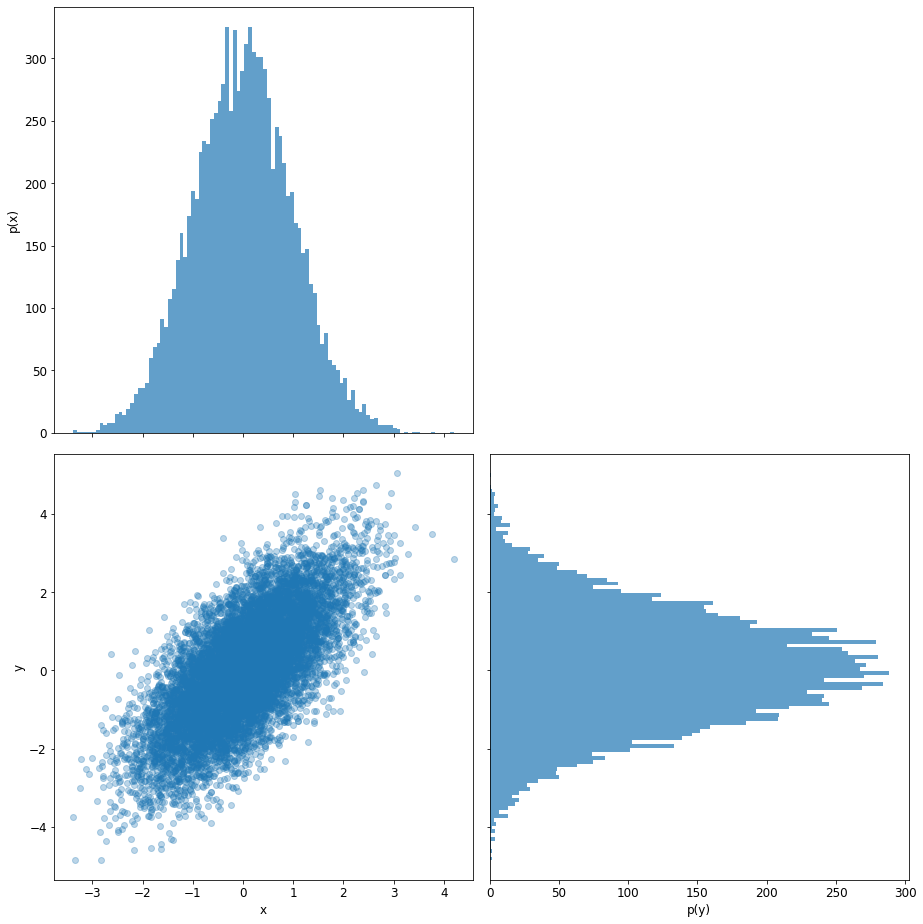

In [62]:

# First, create a figure using plt.figure
fig = plt.figure(figsize=(13, 13))
mpl.rc('font', family='sans serif', size=12)

# Then add the three subplots using plt.subplot(nrow, ncol, index), 
# sharing axes where appropriate (i.e. sharex between the density 
# plot and x-hist, sharey between density plot and y-hist)
hist_x = plt.subplot(2,2,1)
sct_plt = plt.subplot(2,2,3, sharex=hist_x)
hist_y = plt.subplot(2,2,4, sharey=sct_plt)

# Also, hide the ticklabels for the x-axis of the x-hist and 
# the y-axis of the y-hist. The command above should be helpful.
plt.setp(hist_x.get_xticklabels(), visible=False)
plt.setp(hist_y.get_yticklabels(), visible=False)



# Then,
# 1. Generate a scatterplot for the bottom-left subplot, adjusting 
#    colors/opacity as necessary.
sct_plt.scatter(x,y, alpha=0.3)
sct_plt.set(xlabel='x', ylabel='y')
# 2. Generate a histogram for the x-data in the top-left subplot
hist_x.hist(x, bins=100, alpha=0.7)
hist_x.set(ylabel='p(x)')
# 3. Generate a histogram for the y-data in the bottom-right subplot.
#    Rotate 90-degrees by setting the orientation to horizontal.
hist_y.hist(y, bins=100, alpha=0.7, orientation='horizontal')
hist_y.set(xlabel='p(y)')
   
# Don't forget to call fig.tight_layout() to keep the subplots nice & tidy!
fig.tight_layout()
# Finally, save your figure using plt.savefig
fig.savefig('corner_plt.png', format='png', dpi=300, bbox_inches='tight', transparent=True)